In [28]:
import numpy as np

In [30]:
class ScratchLogisticRegression():
    def __init__(self, num_iter, lr, no_bias, verbose,lam):
        self.num_iter = num_iter
        self.lr = lr
        self.bias = no_bias
        self.verbose = verbose
        self.lam = lam
        self.theta = np.array([])
        self.loss = np.array([])
        self.val_loss = np.array([])

    def fit(self, X, y, X_val, y_val):
        """train"""
        if self.bias == True:
            bias = np.ones((X.shape[0], 1))
            X = np.hstack((bias, X))
            bias = np.ones((X_val.shape[0], 1))
            X_val = np.hstack((bias, X_val))
            
        self.theta = np.zeros(X.shape[1])
        self.theta = self.theta.reshape(X.shape[1], 1)
        
        for i in range(self.num_iter):
            pred = self._logistic_hypothesis(X)
            pred_val = self._logistic_hypothesis(X_val)
            self._gradient_descent(X, y)
            loss = self._loss_func(pred, y)
            self.loss = np.append(self.loss, loss)
            loss_val = self._loss_func(pred_val, y_val)
            self.val_loss = np.append(self.val_loss, loss_val)
            if self.verbose == True:
                print('{}-th iter training loss = {}'.format(i,loss))

    def _gradient_descent(self, X, y):
        """Θ update (steepest descent method)"""
        m = X.shape[0]
        n = X.shape[1]
        pred = self._logistic_hypothesis(X)
        for j in range(n):
            gradient = 0
            for i in range(m):
                gradient += (pred[i] - y[i]) * X[i, j]
            self.theta[j] = self.theta[j] - self.lr * ((gradient+self.lam*self.theta[j]) / m)
     
    def _sigmoid(self,y):
        """sigmoid function"""
        return 1 / (1 + np.exp(-y))
        
    def _logistic_hypothesis(self, X):
        pred = X @ self.theta
        pred = self._sigmoid(pred)
        return pred
       
    def predict(self, X):
        """prediction"""
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a, X])
        return np.where(self._logistic_hypothesis(X) >= 0.5,1,0)

    def predict_proba(self, X):
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a, X])
        pred = self._logistic_hypothesis(X)
        return pred
        
    def _loss_func(self, pred, y):
        error = 0
        for i in range(y.shape[0]):
            error += -np.sum(y[i] *  np.log(pred[i])+(1-y[i]) *  np.log(1-pred[i]))
        loss = error / (y.shape[0])
        loss = loss + np.sum(self.theta**2)*self.lam/(2 * y.shape[0])
        return loss

Test

In [32]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data[:100,:]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)

In [33]:
slr = ScratchLogisticRegression(num_iter=50, lr=0.01, no_bias=True, verbose=True, lam=0.1)
slr.fit(X_train, y_train, X_test, y_test)

0-th iter training loss = 0.6931472200322845
1-th iter training loss = 0.686961754356269
2-th iter training loss = 0.6812382975299923
3-th iter training loss = 0.675877750201605
4-th iter training loss = 0.6708040402249368
5-th iter training loss = 0.665958818583265
6-th iter training loss = 0.6612973404683595
7-th iter training loss = 0.6567852853314344
8-th iter training loss = 0.6523963116414182
9-th iter training loss = 0.6481101816149052
10-th iter training loss = 0.6439113255306225
11-th iter training loss = 0.6397877437255853
12-th iter training loss = 0.6357301673142837
13-th iter training loss = 0.6317314168065332
14-th iter training loss = 0.627785911951865
15-th iter training loss = 0.6238892970888292
16-th iter training loss = 0.6200381547020755
17-th iter training loss = 0.6162297863465093
18-th iter training loss = 0.6124620450338267
19-th iter training loss = 0.608733206944696
20-th iter training loss = 0.6050418732038141
21-th iter training loss = 0.6013868946464104
22-

In [34]:
pred = slr.predict_proba(X_test)

In [19]:
pred

array([[0.49474637],
       [0.50845591],
       [0.48537825],
       [0.65292955],
       [0.44628333],
       [0.69147664],
       [0.50665901],
       [0.44545899],
       [0.73243575],
       [0.49615803],
       [0.473976  ],
       [0.64894233],
       [0.69172909],
       [0.4770991 ],
       [0.46902748],
       [0.45648311],
       [0.69103706],
       [0.48396256],
       [0.49300451],
       [0.48342259]])

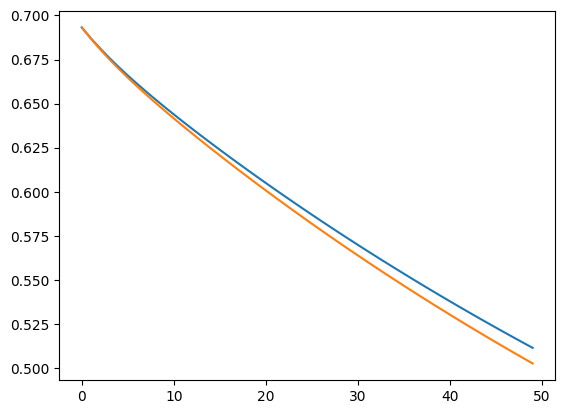

In [35]:
import matplotlib.pyplot as plt
plt.plot(slr.loss)
plt.plot(slr.val_loss)
plt.show()

Decision Boundry

In [61]:
X = iris.data[:100,:2]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)

slr = ScratchLogisticRegression(num_iter=5000, lr=0.001, no_bias=True,verbose=False, lam = 0.5)
slr.fit(X_train, y_train, X_test, y_test)

In [62]:
def decision_region(X,y,slr):
    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01), 
        np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.01)
    )
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
    plt.title('decision region')
    plt.xlabel('feature0')
    plt.ylabel('feature1')
    plt.contourf(mesh_f0, mesh_f1, y_pred,cmap=ListedColormap(['pink', 'skyblue']))
    plt.contour(mesh_f0, mesh_f1, y_pred,colors='red')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],label='1')
    plt.legend()
    plt.show()

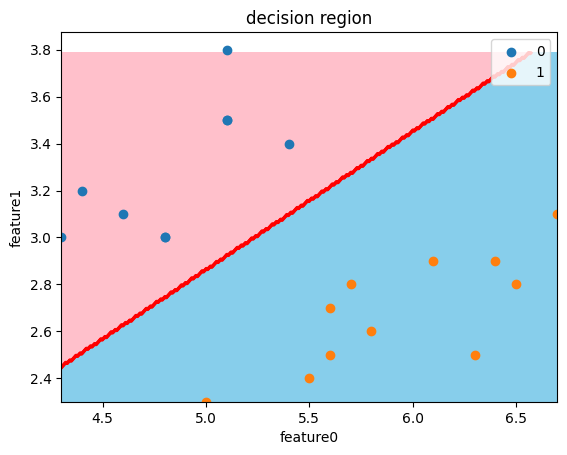

In [69]:
decision_region(X_test,y_test,slr)

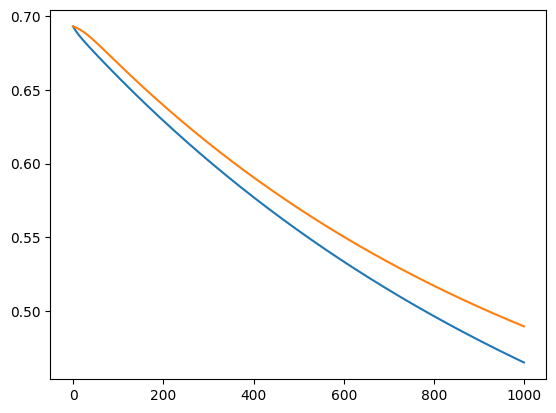

In [27]:
plt.plot(slr.loss)
plt.plot(slr.val_loss)
plt.show()